In [ ]:
!pip install -q mediapipe
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
import csv
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import math

In [ ]:
# field names
fields = ['Image_Number','X_Shoulder_11','Y_Shoulder_11', 'X_Shoulder_12', 'Y_Shoulder_12', 'X_Hip_23', 'Y_Hip_23', 'X_Hip_24', 'Y_Hip_24', 'X_Ankle_27', 'Y_Ankle_27','X_Ankle_28', 'Y_Ankle_28','Stance_Ratio','Stance_Desc','Lateral_Ang', 'Lateral_Desc']

# name of csv file
filename = "/content/drive/MyDrive/cv_project/csv_of_data/records.csv"

# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
    # writing the fields
    csvwriter.writerow(fields)

In [ ]:
# Finding angle between three points

def find_angle(a,b,c):

  ba = a - b # numpy arrays
  bc = c - b

  cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
  angle = np.arccos(cosine_angle)
  angle = ((angle*180)/math.pi)
  return angle

In [ ]:
a = np.array([6,0])
b = np.array([0,0])
c = np.array([0,6])

print(find_angle(a,b,c))

90.0


In [ ]:
# Function to calculate distance
def distance(x1 , y1 , x2 , y2):

    # Calculating distance
    return math.sqrt(math.pow(x2 - x1, 2) +
                math.pow(y2 - y1, 2) * 1.0)

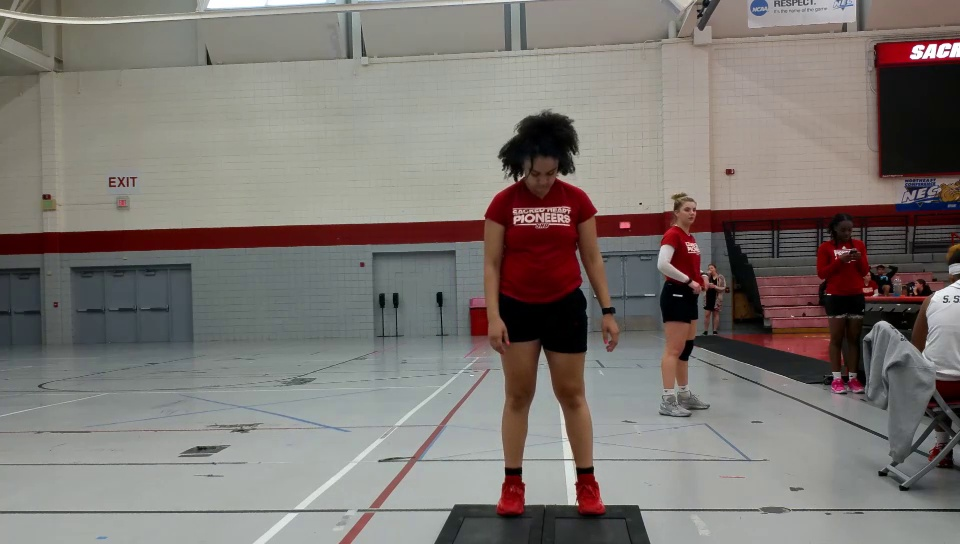

In [ ]:
img = cv2.imread("/content/drive/MyDrive/cv_project/data/frame{}.jpg".format(137))
cv2_imshow(img)

In [ ]:
def write_details(link,frame_number):
  # STEP 2: Create an PoseLandmarker object.
  base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
  options = vision.PoseLandmarkerOptions(
      base_options=base_options,
      output_segmentation_masks=True)
  detector = vision.PoseLandmarker.create_from_options(options)

  # STEP 3: Load the input image.
  image = mp.Image.create_from_file(link)

  # STEP 4: Detect pose landmarks from the input image.
  detection_result = detector.detect(image)

  # STEP 5: Process the detection result. In this case, visualize it.
  # annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
  # cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

  # STEP 6:
  details_to_save=[]
  details_to_save.append(frame_number)
  points_x_11= math.ceil(detection_result.pose_landmarks[0][11].x*960)
  details_to_save.append(points_x_11)
  points_y_11= math.ceil(detection_result.pose_landmarks[0][11].y*544)
  details_to_save.append(points_y_11)

  points_x_12= math.ceil(detection_result.pose_landmarks[0][12].x*960)
  details_to_save.append(points_x_12)
  points_y_12= math.ceil(detection_result.pose_landmarks[0][12].y*544)
  details_to_save.append(points_y_12)

  points_x_23= math.ceil(detection_result.pose_landmarks[0][23].x*960)
  details_to_save.append(points_x_23)
  points_y_23= math.ceil(detection_result.pose_landmarks[0][23].y*544)
  details_to_save.append(points_y_23)

  points_x_24= math.ceil(detection_result.pose_landmarks[0][24].x*960)
  details_to_save.append(points_x_24)
  points_y_24= math.ceil(detection_result.pose_landmarks[0][24].y*544)
  details_to_save.append(points_y_24)

  points_x_27= math.ceil(detection_result.pose_landmarks[0][27].x*960)
  details_to_save.append(points_x_27)
  points_y_27= math.ceil(detection_result.pose_landmarks[0][27].y*544)
  details_to_save.append(points_y_27)

  points_x_28= math.ceil(detection_result.pose_landmarks[0][28].x*960)
  details_to_save.append(points_x_28)
  points_y_28= math.ceil(detection_result.pose_landmarks[0][28].y*544)
  details_to_save.append(points_y_28)

  stance_shoulder = distance(points_x_11,points_y_11,points_x_12, points_y_12)
  stance_ankle = distance(points_x_27,points_y_27,points_x_28, points_y_28)

  stance_ratio = (stance_shoulder)/(stance_ankle)
  details_to_save.append(stance_ratio)

  if stance_ratio >= 0.8 and stance_ratio <= 1.2:
    details_to_save.append("no_error")
  elif stance_ratio< 0.8:
    details_to_save.append("wide_stance_error")
  elif stance_ratio>1.2:
    details_to_save.append("narrow_stance_error")

  hip_midpoint_x = (points_x_23 + points_x_24)/2
  hip_midpoint_y = (points_y_23 + points_y_24)/2
  hip_array = np.array([hip_midpoint_x,hip_midpoint_y])

  top_of_frame_x = (points_x_27 + points_x_28)/2
  top_of_frame_y = (points_y_27 + points_y_28)/2
  top_array = np.array([top_of_frame_x,top_of_frame_y])

  shoulder_midpoint_x = (points_x_11 + points_x_12)/2
  shoulder_midpoint_y = (points_y_11 + points_y_12)/2
  shoulder_array = np.array([shoulder_midpoint_x,shoulder_midpoint_y])

  lateral_angle = find_angle(top_array,hip_array,shoulder_array)
  details_to_save.append(lateral_angle)

  if (0 <= lateral_angle <= 3.1):
    details_to_save.append("no_error")
  elif (176.9 <= lateral_angle <= 180):
    details_to_save.append("no_error")
  else:
    details_to_save.append("error")
  # print(details_to_save)

  filename = "/content/drive/MyDrive/cv_project/csv_of_data/records.csv"
  with open(filename, 'a') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
    # writing the fields
    csvwriter.writerow(details_to_save)


In [ ]:
for i in range (0,210):
  # img = cv2.imread("/content/drive/MyDrive/cv_project/data/frame{}.jpg".format(i))
  # cv2_imshow(img)
  write_details('/content/drive/MyDrive/cv_project/data/frame{}.jpg'.format(i),i)